# Week-1 Assignment

# **Gotta catch 'em all !**

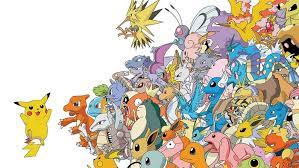

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 2) Read the csv file and assign it to a variable .

**Reading the csv file 'W1_Pokemon.csv' by mounting the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/W1_Pokemon.csv'
df = pd.read_csv(path)

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [4]:
print(df.shape)


(800, 13)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [5]:
print(df.columns)


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 5) Remove the column '#' and update the dataframe.

***To remove a column of a dataframe we use *drop()* function and set *inplace = True* to make changes in original dataframe.***

In [6]:
df.drop('#', axis=1, inplace=True)


### 6) Set the 'Name' column as the index of dataframe

***To set the column of dataframe as the index of dataframe we use *set_index* function and set *inplace = True* to make changes in orginal dataframe.***

In [7]:
df.set_index('Name', inplace=True)


###  7) Print a list of all the unique Type-1 powers

**We use *unique()* function of dataframe to print unique values of a particular column.**

In [8]:
print(df['Type 1'].unique())


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

**We use *insert()* function of dataframe to insert a column.**

In [9]:
df.insert(2, 'Type 1+Type 2', df['Type 1'] + ' + ' + df['Type 2'])


**We apply the given condition on the dataframe and use *shape* attribute of dataframe setting *shape[0]* to print only no. of rows (no. of pokemons) of the dataframe.**

In [10]:
print("No. of Pokemons = ",df[df['Type 1+Type 2'] == 'Psychic + Flying'].shape[0])

No. of Pokemons =  6


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

**To use that column 'Name' first we will make it as a column by using reset_index() function. Then we apply the given condition on the column 'Name' and use shape attribute of dataframe setting *shape[0]* to print only no. of rows (no. of pokemons) of the dataframe.**

In [11]:
df.reset_index(inplace=True)
print(df[df['Name'].str.contains('Mega')].shape[0])


49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

**We use *std()* function of dataframe to calculate standard deviation.**

In [12]:
print('Standard Deviation = ',df['Sp. Def'].std())


Standard Deviation =  27.82891579711746


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [13]:
print('Percentage = ',round((df[df['Legendary'] == True].shape[0]/df.shape[0])*100,3))


Percentage =  8.125


### 4. Name the pokemon(s) with Maximum Defense.

**We apply the given condition and use *max()* function to calculate the maximum defense.**

In [14]:
print(df[df['Defense'] == df['Defense'].max()]['Name'])


224    SteelixMega Steelix
230                Shuckle
333      AggronMega Aggron
Name: Name, dtype: object


### 5. Which poison pokemon has the strongest attack ?

**We apply the given condition and use *idmax()* function of dataframe to find the maximum attack for type 1 Poison Pokemon.**

In [15]:
id = df[df['Type 1'] == 'Poison']['Attack'].idxmax()
print(df.loc[id, 'Name'])

Toxicroak


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

**Using the dataframe *'W1_Pokemon.csv' (df)* we will create three different types of plots using Python Library *Seaborn*.**

In [29]:
data = df

### **Line Plot**

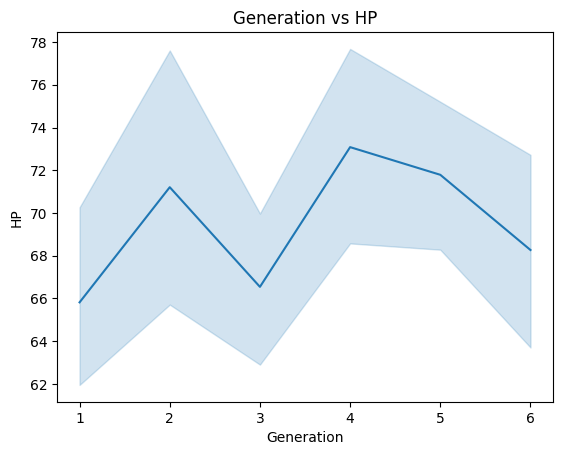

In [34]:
sns.lineplot(data=data, x='Generation', y='HP')
plt.title('Generation vs HP')
plt.xlabel('Generation')
plt.ylabel('HP')
plt.show()

### **Kernel Density Estimation (KDE) Plot**

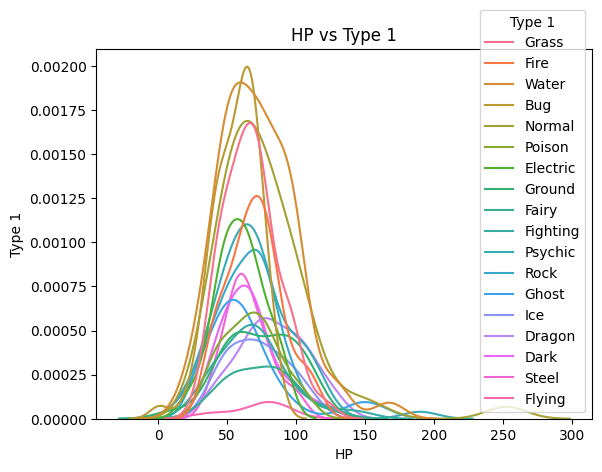

In [35]:
sns.kdeplot(data=data, x='HP', hue='Type 1')
plt.title('HP vs Type 1')
plt.xlabel('HP')
plt.ylabel('Type 1')
plt.show()


### **Heat Maps**

<Axes: xlabel='Generation', ylabel='Name'>

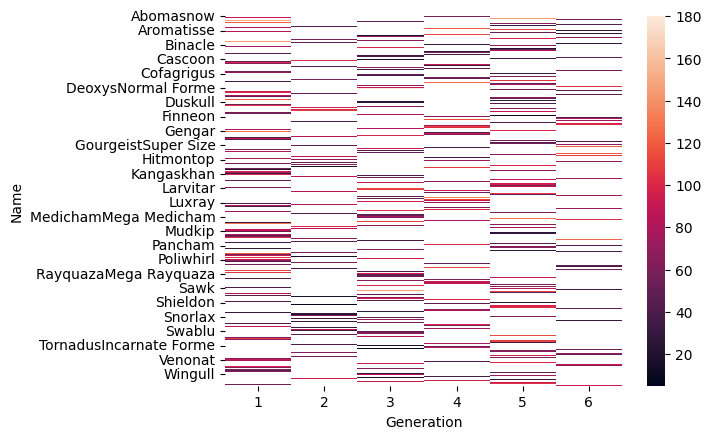

In [43]:
data.pivot_table(index='Name', columns='Generation', values='Speed', aggfunc='mean')
sns.heatmap(data.pivot_table(index='Name', columns='Generation', values='Speed', aggfunc='mean'))


### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

**First get the names of the top 2 fastest non-legendary Ghost Pokemon. Then get the index of the second fastest and then get the name of the second fastest non-legendary Ghost Pokemon.**

In [18]:
top2_ghost = df[(df['Type 1'] == 'Ghost') & (df['Legendary'] == False)]['Speed'].nlargest(2)
second_fastest_index = top2_ghost.index[1]
second_fastest_name = df.loc[second_fastest_index, 'Name']
print(second_fastest_name)

Gengar


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

**We have applied the given conditions and used *shape* attribute setting shape [0] to display number of pokemons.**

In [19]:
charizard_attack = df[df['Name'] == 'Charizard']['Attack'].iloc[0]
charizard_defense = df[df['Name'] == 'Charizard']['Defense'].iloc[0]
result = df[(df['Legendary'] == False) & (df['Attack'] < charizard_attack) & (df['Defense'] > charizard_defense)]
print(result.shape[0])

116



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [20]:
print(df[df['Attack'] + df['Sp. Atk'] == df['Attack'] + df['Sp. Atk'].max()]['Name'])


164    MewtwoMega Mewtwo Y
Name: Name, dtype: object


### Which type of legendary pokemons are the most common?

**We use *mode()* function of dataframe for maximum occurences.**

In [21]:
print(df[df['Legendary'] == True]['Type 1'].mode())

0    Psychic
Name: Type 1, dtype: object


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [22]:
print(df[(df['Legendary'] == True) & (df['Generation'] == 3) & (df['HP'] > df['HP'].min())].shape[0])


18


### Print out the third slowest pokemon(s) in the dataset.

In [23]:
top3_pokemon = df['Speed'].nsmallest(3)
print(top3_pokemon)
third_slowest_index = top3_pokemon.index[2]
third_slowest_name = df.loc[third_slowest_index, 'Name']
print(third_slowest_name)

230     5
495     5
359    10
Name: Speed, dtype: int64
Trapinch


### Which pokemon type has the highest average HP?

In [24]:
average_hp_by_type = df.groupby('Type 1')['HP'].mean()
highest_avg_hp_type = average_hp_by_type.idxmax()
print(f"The Pokemon type with the highest average HP is: {highest_avg_hp_type}")

The Pokemon type with the highest average HP is: Dragon
